# Salary Predictions Based on Job Descriptions

### ----1 Define the problem ----
**Background:** Often when job advertisements are posted online, the employer neglects to mention the salary. To an individual looking for a job, this poses a dilemma; do they risk wasting valuable time investigating a low paying job, or skip the advertisement and risk ignoring a great opportunity.

**Objectives:**
- To create a model which can precisely predict the salary of new job advertisements based on the historical data of existing employees.
- To understand what factors contributed most to prediction of salary.
- Analyze the relation between salary and different input features and provide trends.

**Motivation:** This model can tackle many business problems in real world.
- Filter out candidates with different features as per the company's requirements.
- Talent can be quantified as per candidate features and provide them competitive offers.

### ----2 Data Description----

The data will be read in from three CSV files:

- train_features.csv: Contains the feature data for each record for training the model.
- train_salaries.csv: Contains the target values for each posting for training the model.
- test_features.csv: Contains the feature data for the postings which will be used for final test phase.

### ----3 Features----
1.  **Company id**:The company which is posting job.
1.  **Experience**:Years of experience for the particular role.
2.  **Job Type**: The position held (CEO, CFO, CTO, Vice President, Manager, Janitor, and senior or junior position)
3.  **College Degree**: Doctoral, Masters, Bachelors, High School, or None
4.  **College Major**: Biology, Business, Chemistry, Computer Science, Engineering, Literature, Math, Physics, or None
5.  **Industry**: Auto, Education, Finance, Health, Oil, Service, or Web
6.  **Miles From Metropolis**: How many miles away from a major city

### ----4 Metrics Evaluation----
I will be using Mean Squared Error (MSE) metrics to evaluate the model. The goal of the model is to provide a score lower than MSE 360.

### ----2 Load the data----

In [1]:
#import your libraries
import pandas as pd
import sklearn as sk
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
#etc

#your info here
__author__ = "Ishant Gupta"
__email__ = "ishantg3@gmail.com"

In [3]:
#load the data into a Pandas dataframe
df1=pd.read_csv(r"C:\Users\Ishant\Desktop\Instructions_and_Notebook\train_features.csv")
df2=pd.read_csv(r"C:\Users\Ishant\Desktop\Instructions_and_Notebook\train_salaries.csv")
train_df=pd.merge(df1, df2, on="jobId")
train_df=train_df.rename(columns={"jobId":"jobid", "companyId": "company_id", "jobType":"job_type",
                                 "yearsExperience":"experience", "milesFromMetropolis": "miles_from_metropolis"})
train_df.head()

,jobid,company_id,job_type,degree,major,industry,experience,miles_from_metropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [4]:
numerical_feat=[f for f in train_df.columns if train_df.dtypes[f]!="object"]
categorical_feat=[f for f in train_df.columns if train_df.dtypes[f]=="object"]

### ---- 3 Describe & Clean the data ----

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobid                    1000000 non-null object
company_id               1000000 non-null object
job_type                 1000000 non-null object
degree                   1000000 non-null object
major                    1000000 non-null object
industry                 1000000 non-null object
experience               1000000 non-null int64
miles_from_metropolis    1000000 non-null int64
salary                   1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [6]:
train_df.isnull().any()

jobid                    False
company_id               False
job_type                 False
degree                   False
major                    False
industry                 False
experience               False
miles_from_metropolis    False
salary                   False
dtype: bool

In [12]:
train_df.describe()

,experience,miles_from_metropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [13]:
train_df.describe(include="O")

,jobid,company_id,job_type,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684691094,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


**Observations**: 
1. Minimum value of target feature is zero which does not make any sense therefore it is important to check for outliers.
2. Independent variable "company_id" has 63 unique categories which is quite complex to train and needs to be verified its relevance with target variable.

### ----4 EDA-1----

Text(0.5, 1.0, 'Skewness Check')

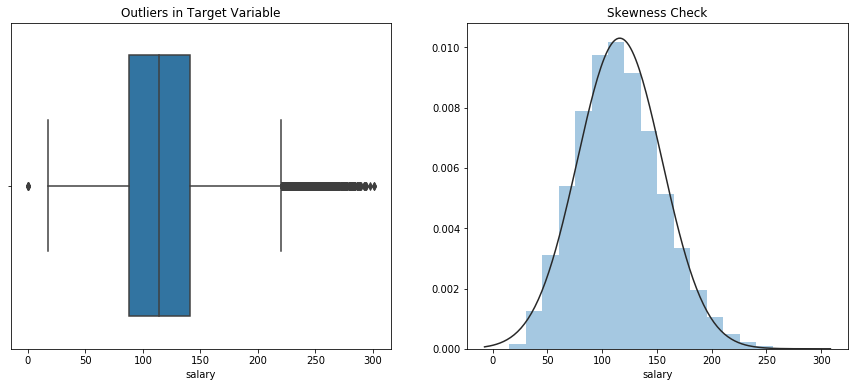

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary)
plt.title("Outliers in Target Variable")
plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins=20, kde=False, fit=stats.norm)
plt.title("Skewness Check")

**Note**: 
- Figure 1 indicates obvious outlier in between 0-10.
- Figure 2 does show slight skewness on the rightside, which might need to be checked.

In [22]:
train_df[train_df.salary<10]

,jobid,company_id,job_type,degree,major,industry,experience,miles_from_metropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


**Note**: "Zero" salary in target column does not make any sense, therefore these values should be removed from the training dataset.

In [7]:
train_df=train_df[train_df.salary>10] #removing outliers
train_df.shape

(999995, 9)

#### --- 4.1 Relation between numerical features and target variable---

In [26]:
train_df.dtypes

jobid                    object
company_id               object
job_type                 object
degree                   object
major                    object
industry                 object
experience                int64
miles_from_metropolis     int64
salary                    int64
dtype: object

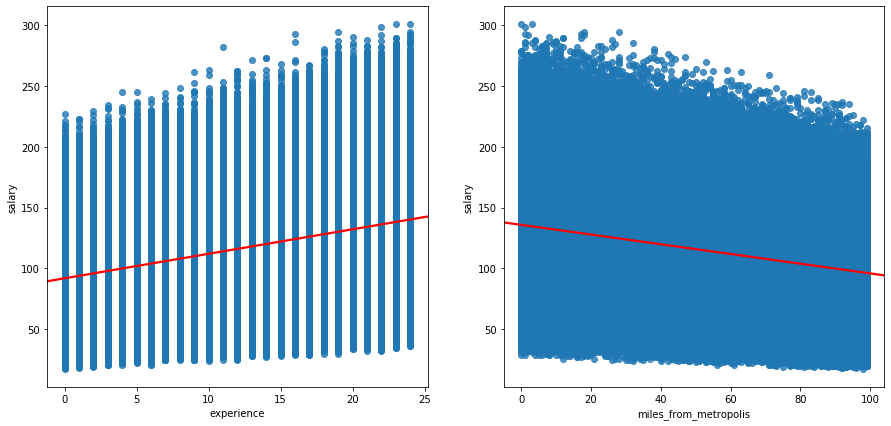

In [29]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.regplot(x="experience", y="salary", line_kws={"color":"r"}, data=train_df)
plt.subplot(1,2,2)
sns.regplot(x="miles_from_metropolis", y="salary", line_kws={"color":"r"}, data=train_df)

**Observation**: Data is quite spreaded out in above figures. However, experience has slight positive correlation with salary whereas miles_from_metropolis has negative correlation.

#### --- 4.2 Relation between categorical features and target variable---

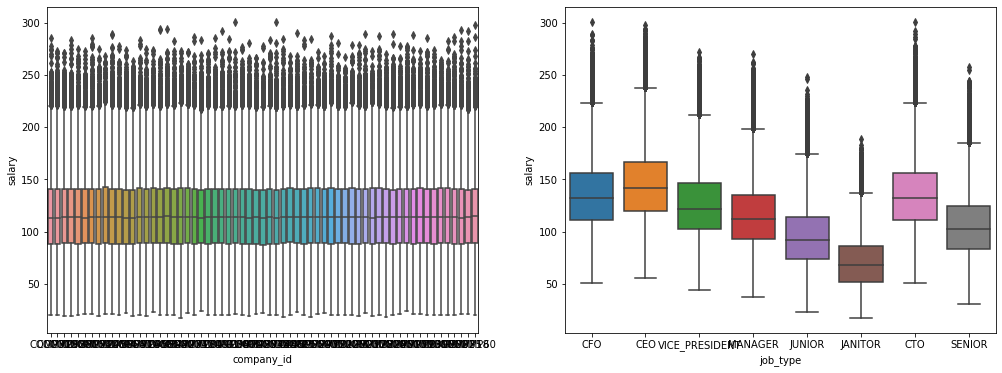

In [9]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
sns.boxplot(x="company_id", y="salary", data=train_df)
plt.subplot(1,2,2)
sns.boxplot(x="job_type", y="salary", data=train_df)

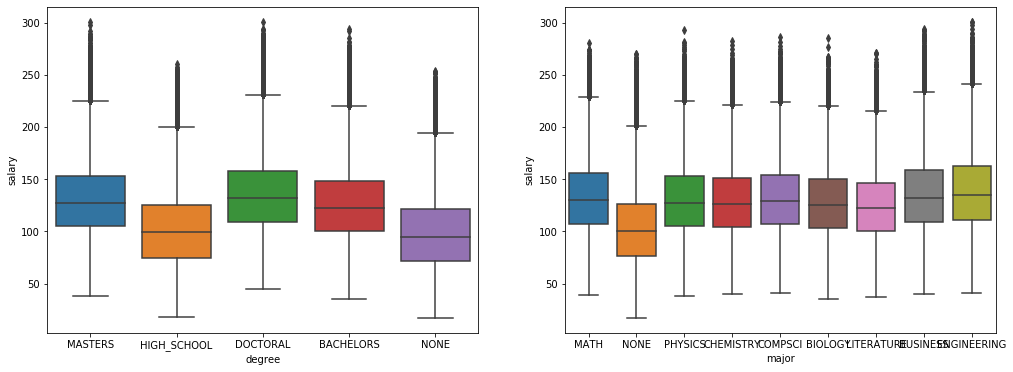

In [10]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
sns.boxplot(x="degree", y="salary", data=train_df)
plt.subplot(1,2,2)
sns.boxplot(x="major", y="salary", data=train_df)

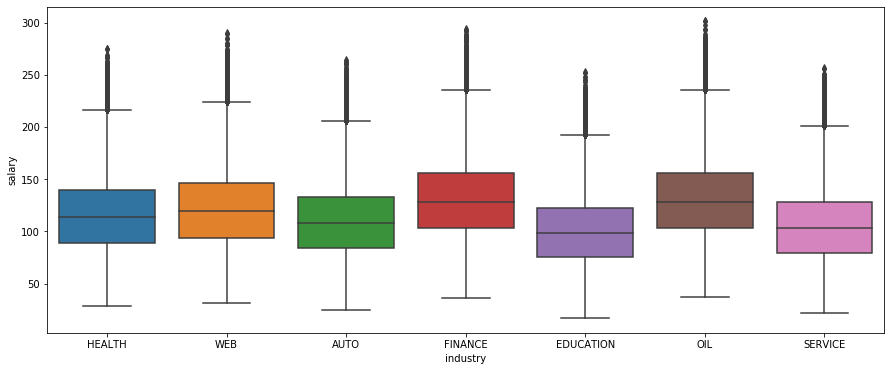

In [13]:
plt.figure(figsize=(15,6))
sns.boxplot(x="industry", y="salary", data=train_df)

**Observations:**
1. "company_id" does not reveal any significant information.
2. In "job_type" each role provide slight difference in salary.
3. In "degree" High School and None categories have lowest salaries as compared to others.
4. Jobs which required none specialization has significantly less salary when compared to others in "major".
5. Service and education sectors show slight difference in salary in regards to "industry".

In [16]:
def encode_label(df, col):
    cat_dict={}
    cats=df[col].unique().tolist()
    for cat in cats:
        cat_dict[cat]=df[df[col]==cat].salary.mean()
    df[col] = df[col].map(cat_dict)

In [ ]:
train_vis=train_df.copy()
for col in train_vis.columns:
    if train_vis[col].dtype.name=="object":
        encode_label(train_vis, col)

In [8]:
train_df.drop(["jobid","company_id"],axis=1,inplace=True)

#### ---4.3 Relation between experience, job_type and salary---

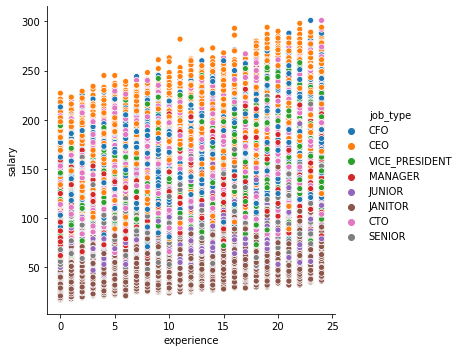

In [37]:
sns.relplot(x="experience", y="salary",hue= "job_type", kind="scatter", data=train_df)

**Note:** For every job_type there is hike in salary with respect to increase in experience. To see the effect of experience with better visualization lets make bins for experience. 

In [9]:
train_df["experience_bracket"]=pd.cut(train_df.experience, bins= [-1, 6, 12, 18, 25], labels=["0-6", "7-12", "13-18", "19-25"])

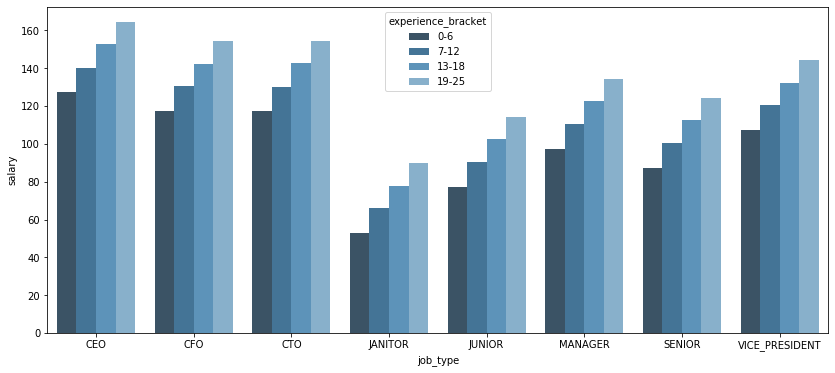

In [10]:
plt.figure(figsize=(14,6))
data=train_df.groupby(["experience_bracket", "job_type"])
sns.barplot(x="job_type", y="salary", hue="experience_bracket", palette="Blues_d", data=data.mean().salary.reset_index())

**Observation:** There is clear increase of salary for each bin of experience with each job_type.

Text(0, 0.5, 'Salary Frequency')

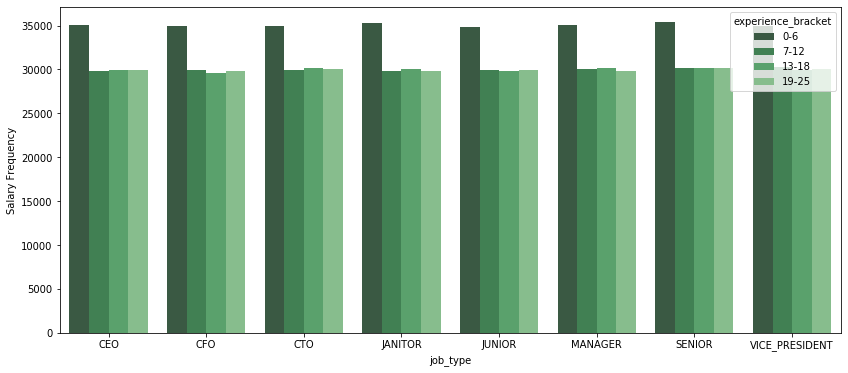

In [47]:
plt.figure(figsize=(14,6))
data=train_df.groupby(["experience_bracket", "job_type"])
sns.barplot(x="job_type", y="salary", hue="experience_bracket", palette="Greens_d", data=data.count().salary.reset_index())
plt.ylabel("Salary Frequency")

**Observation:** Above figure indicates that experience is not a deciding factor for job_type. It only implies experience in that particular category. Figure illustrates that there is equal likelihood of getting jobs such as CEO, CTO & CFO with an experience less than 6 years as like other categories of getting jobs with similar amount of experience. It implies experience has nothing to do in decideing the job_type. Therefore it shows salary and experience have very low dependency than expected. However, salary is more dependent on job_type.

#### ---4.4 Relations with "jobType", "major" and "degree" towards salary---

Text(0.5, 1.0, 'Count of employees for each major')

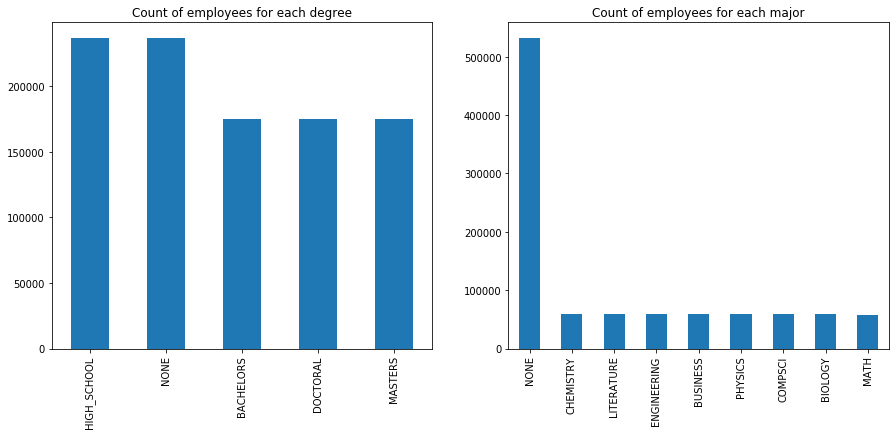

In [49]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
train_df.degree.value_counts().plot.bar()
plt.title("Count of employees for each degree")
plt.subplot(1,2,2)
train_df.major.value_counts().plot.bar()
plt.title("Count of employees for each major")

**Observation:** Most of the None and High School in "Degree" is directly related to None in "major.

Text(0.5, 1.0, 'Count of employees for each role')

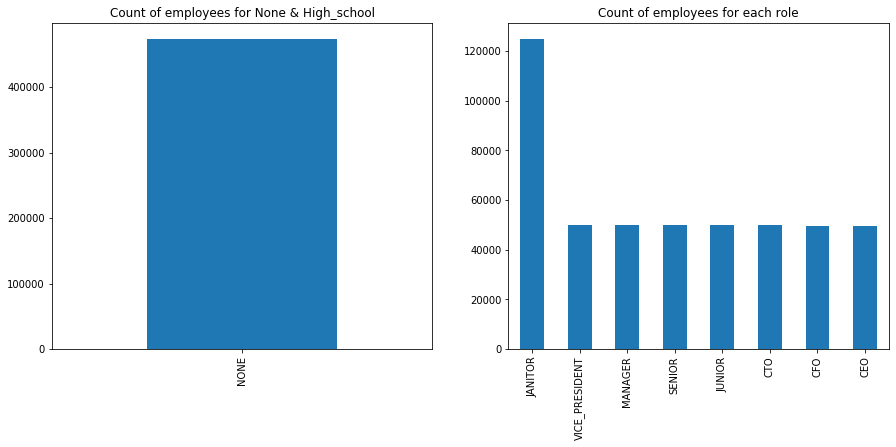

In [52]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
train_df[(train_df.degree=="NONE") | ((train_df.degree=="HIGH_SCHOOL"))].major.value_counts().plot.bar()
plt.title("Count of employees for None & High_school")
plt.subplot(1,2,2)
train_df[(train_df.degree=="NONE") | ((train_df.degree=="HIGH_SCHOOL"))].job_type.value_counts().plot.bar()
plt.title("Count of employees for each role")

**Observation:** Figure indicates that None & high_school "degree" level influences a lot in determining the job_type which in turn accounts for all the "Janitor" in job_type. Above two figures imply that creation of attended college and job_level columns will provide more relevant relation.

In [12]:
def Attended_College(df):
    if(df.degree=="NONE" or df.degree=="HIGH_SCHOOL"):
        return "No"
    else:
        return "Yes"

In [13]:
train_df["Attended_College"]=train_df.apply(Attended_College, axis=1 )

In [14]:
def job_level(df):
    if (df.job_type=="JANITOR"): 
        return "JANITOR"

    if((df.job_type=="JUNIOR")or(df.job_type=="SENIOR")):
        return "Average Employees"
    
    if((df.job_type=="MANAGER")or(df.job_type=="VICE_PRESIDENT")):
        return "Management"

    if((df.job_type=="CEO")or(df.job_type=="CTO")or(df.job_type=="CFO")):
        return "Executives"

In [58]:
train_df["job_level"]=train_df.apply(job_level, axis=1)

#### --- 4.5 Relation between miles, job_type, experience with salary---

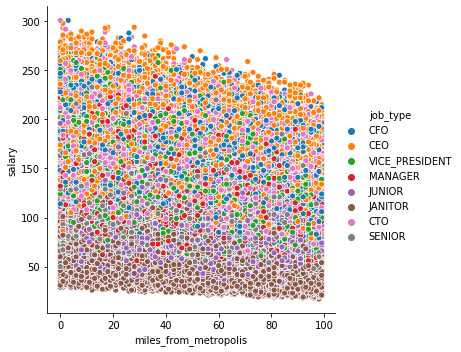

In [60]:
sns.relplot(x="miles_from_metropolis", y="salary", kind="scatter",hue="job_type",data=train_df)

**Note:** For every job_type there is decrease in salary with respect to increase in miles. To see the effect of miles on salary with better visualization lets make bins for miles_from_metropolis. 

In [64]:
train_df["distance_bracket"]=pd.cut(train_df.miles_from_metropolis, bins=[-1,10,20,30,40,50,60,70,80,90,100], labels=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

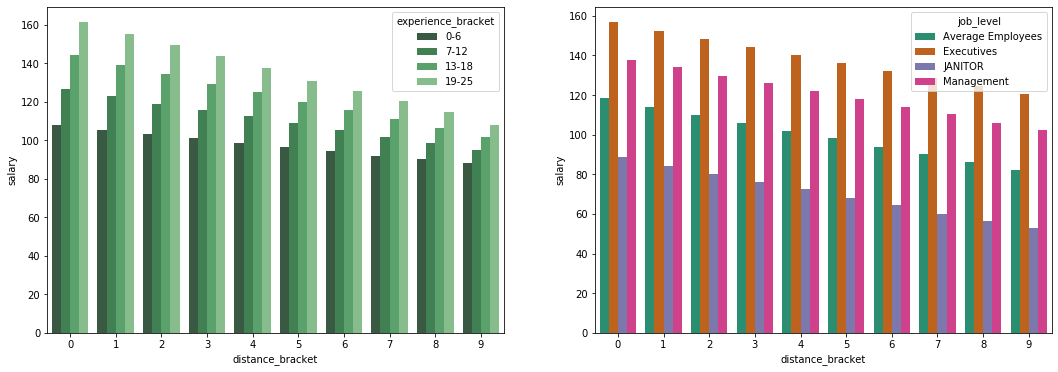

In [67]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
data=train_df.groupby(["distance_bracket", "experience_bracket"])
sns.barplot(x="distance_bracket", y="salary", hue="experience_bracket", palette="Greens_d", data=data.mean().salary.reset_index())
plt.subplot(1,2,2)
data=train_df.groupby(["distance_bracket", "job_level"])
sns.barplot(x="distance_bracket", y="salary", hue="job_level", palette="Dark2", data=data.mean().salary.reset_index())

**Observation:** Overall slight decrease in salary as the distance increases irrespective of job_type and experience bracket.

In [74]:
def feature_workshop(df, feat_list, col_name):
    group=df.groupby(feat_list)
    mean_encode=pd.DataFrame({col_name:group["salary"].mean()})
    df=pd.merge(df, mean_encode, on=feat_list, how="left")
    return df

In [75]:
train_df=feature_workshop(train_df, ['job_type', 'degree', 'major','industry'],"cat_df_mean")
train_df=feature_workshop(train_df, ["experience_bracket", "distance_bracket"], "exp_dist_mean")
train_df=feature_workshop(train_df,["distance_bracket","job_level"],"dist_job_mean")

In [78]:
train_final=train_df.drop(["experience_bracket", "distance_bracket", "job_level","jobid", "company_id" ], axis=1)

In [79]:
train_final.head()

,job_type,degree,major,industry,experience,miles_from_metropolis,salary,Attended_College,cat_df_mean,exp_dist_mean,dist_job_mean
0,CFO,MASTERS,MATH,HEALTH,10,83,130,Yes,141.246753,98.397741,124.448359
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,No,140.051566,92.133040,128.446613
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,Yes,133.640097,115.555975,125.984643
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,Yes,118.915865,123.099326,134.086609
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,Yes,142.290323,123.099326,134.086609


In [86]:
train_final.to_csv(r"C:\Users\ssharma\Desktop\Instructions_and_Notebook\cleaned.csv")

#### --- 5 Baseline Model---

In [2]:
train_final=pd.read_csv(r"C:\Users\Ishant\Desktop\Data_files\cleaned_data.csv")
train_final.head()

NameError: name 'pd' is not defined

In [26]:
train_final=train_final.drop([ "job_level", "experience_bracket", "distance_bracket" ,"jobid", "cat_df_mean_x","exp_dist_mean_x","dist_job_mean_x","cat_df_mean_y","exp_dist_mean_y","dist_job_mean_y"], axis=1)
train_final.head()

,job_type,degree,major,industry,experience,miles_from_metropolis,salary,attended_college,cat_df_mean,exp_dist_mean,dist_job_mean
0,CFO,MASTERS,MATH,HEALTH,10,83,130,YES,141.246753,98.397741,124.448359
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,NO,140.051566,92.133040,128.446613
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,YES,133.640097,115.555975,125.984643
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,YES,118.915865,123.099326,134.086609
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,YES,142.290323,123.099326,134.086609


In [27]:
x=train_final.drop(["salary"], axis=1)
y=train_final["salary"]

In [28]:
x=pd.get_dummies(x)

In [29]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
import statsmodels.api as sm

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=40)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(799996, 36)
(799996,)
(199999, 36)
(199999,)


#### ---Linear Regression---
I am using a simple linear regression model as a baseline model so that this model can helps to understand the trends better and further we will see how feature engineering works on the model.

In [31]:
lr=LinearRegression(fit_intercept=True)

In [32]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
def Linear_Model(lr,X,Y,kind):
    print("Validating the model on "+kind+".....")
    
    y_pre=lr.predict(X)
    
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.regplot(x=Y, y=y_pre,line_kws={"color":"r"})
    plt.xlabel("Actual Salary")
    plt.ylabel("Predicted Salary")
    
    plt.subplot(1,2,2)
    sns.distplot(Y - y_pre,bins=20)
    plt.title("Error Plot")
    plt.show
    
    #5 Fold Cross Validation
    cv_score = cross_val_score(lr, X, Y, cv=5)
    print("\n",cv_score,"\n")
    print("\n  5-Fold Cross Validation on "+kind, (np.mean(cv_score)))
    
    # MSE - 
    print('\n MSE on '+kind, mean_squared_error(Y, y_pre))
    
    

v

Validating the model on train_data.....

 [0.75896332 0.75759988 0.75895026 0.75742102 0.75838018] 


  5-Fold Cross Validation on train_data 0.7582629329669284

 MSE on train_data 361.9014190848229


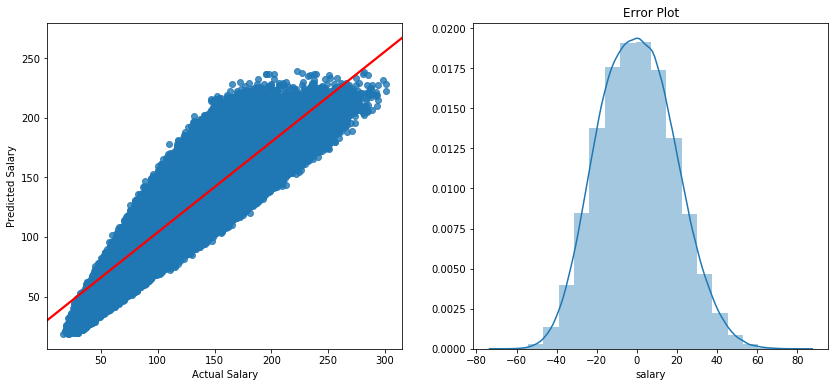

In [45]:
df_tr=Linear_Model(lr, x_train, y_train, "train_data")

**Validating Testing Set**

Validating the model on test_data.....

 [0.76067646 0.7603086  0.76035223 0.76015758 0.75750467] 


  5-Fold Cross Validation on test_data 0.7597999085125889

 MSE on test_data 361.6692720899022


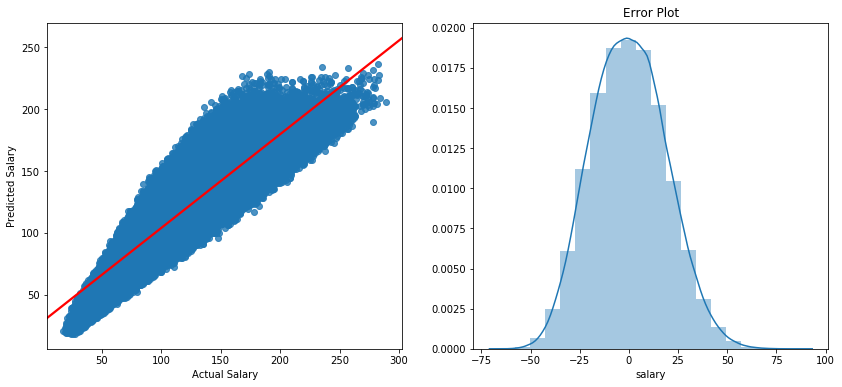

In [46]:
df_ts=Linear_Model(lr, x_test, y_test, "test_data")

#### -- Polynomial Features-- 
Now model will be updated by added more features such as polynomial and lets see how it improves the accuracy.

In [1]:
poly_trans=PolynomialFeatures(degree=2, interaction_only=True)
x_tr_poly=poly_trans.fit_transform(x_train)
x_ts_poly=poly_trans.fit_transform(x_test)

NameError: name 'PolynomialFeatures' is not defined